In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
data = pd.read_csv('Pokemon.csv')

In [4]:
data.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,3,False
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
7,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,2,False
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False
9,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False


# Scatter Plot

We use Scatter Plot to display the relation between two continuous features.

We will use the "Attack" and "Defence" features

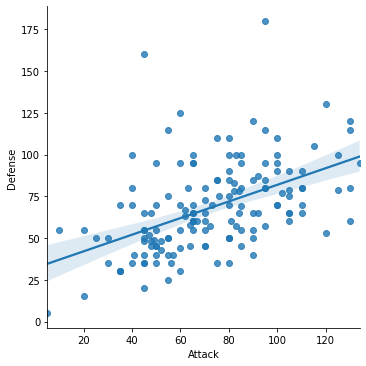

In [6]:
sns.lmplot(x='Attack',y="Defense",data=data)

In order to remove the regression line and apply hue, we can do the following

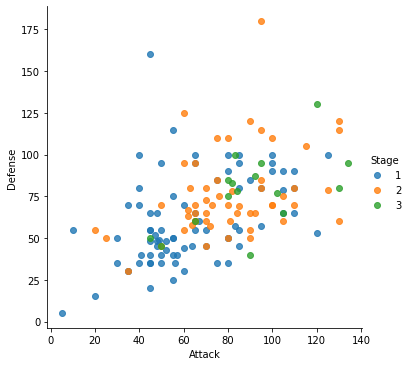

In [8]:
sns.lmplot(x='Attack',y="Defense",fit_reg=False ,hue='Stage' ,data=data)

Even though Seaborn has everything we might need to make plot. We have to use matplotlib for setting up axes limits

(0.0, 140.45)

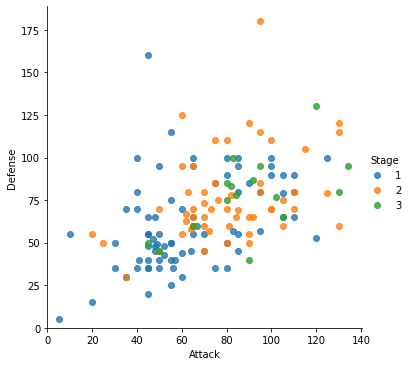

In [9]:
sns.lmplot(x='Attack',y="Defense",fit_reg=False ,hue='Stage' ,data=data)
plt.ylim(0,None)
plt.xlim(0,None)

We can directly use the sns.scatterplot, which will directly give us the above plot with less code to write

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

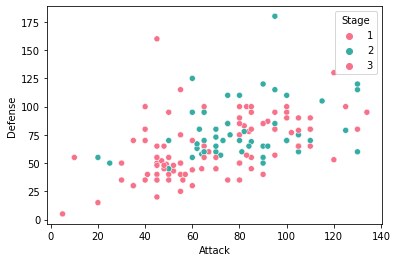

In [11]:
sns.scatterplot(x='Attack', y='Defense', data=data, hue='Stage',palette='husl')

# Box Plot

Box plot shows the distribution across different categories


<img src='https://www.simplypsychology.org/boxplot.jpg?ezimgfmt=rs:555x285/rscb26/ng:webp/ngcb26' style="max-width:50%;"></img>

In [12]:
data.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,3,False
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
7,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,2,False
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False
9,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False


<AxesSubplot:>

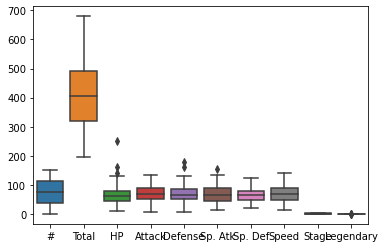

In [13]:
sns.boxplot(data=data)

There are lot of features whose box plot is not required or in other words, we won't get any useful information out of these redundant box plots. So we will drop few of the features and make a new data frame

<AxesSubplot:>

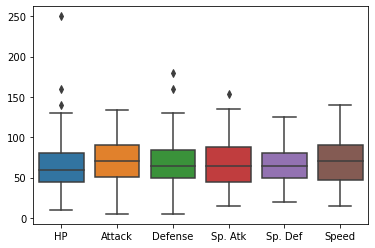

In [16]:
box_df = data.drop(['#','Total','Stage','Legendary'],axis=1)
sns.boxplot(data=box_df)

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

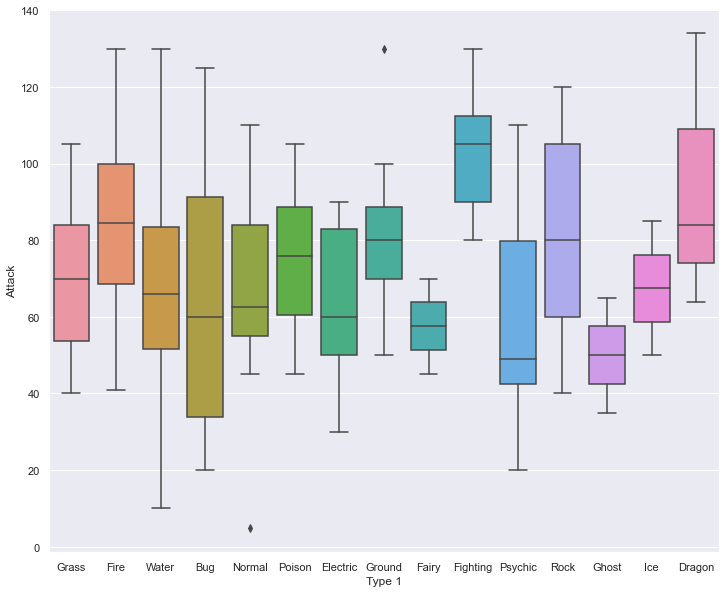

In [19]:
sns.set(rc={'figure.figsize':(12,10)})
sns.boxplot(x='Type 1', y='Attack', data=data)

<AxesSubplot:xlabel='Type 1', ylabel='Defense'>

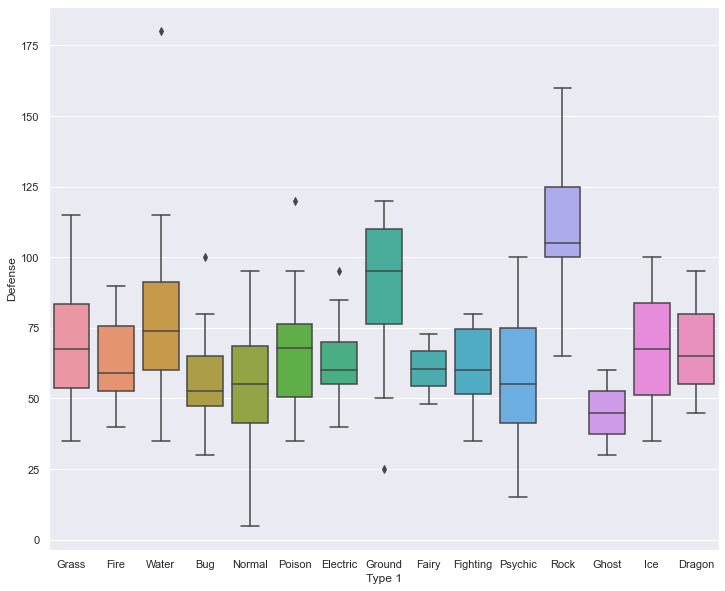

In [20]:
sns.set(rc={'figure.figsize':(12,10)})
sns.boxplot(x='Type 1', y='Defense', data=data)

# Violin and Swarm Plots

Just like box plot Violin Plot is a method of plotting a numeric data, with the addition of rotated kernal density plot on each side. They are very similar to box plot, except that they show the probability density of the data at different values.

<img src='https://miro.medium.com/max/813/1*TTMOaNG1o4PgQd-e8LurMg.png' style="max-width:50%;"></img>

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

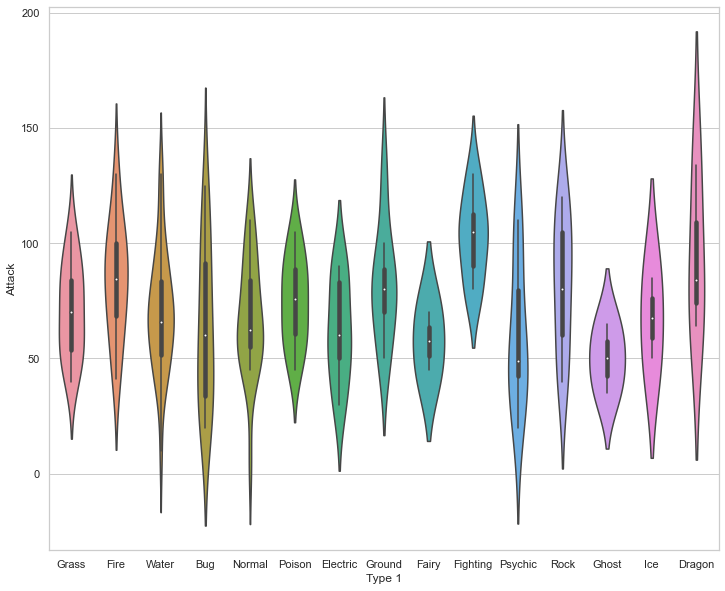

In [24]:
sns.set_style('whitegrid')
sns.violinplot(x='Type 1', y='Attack', data=data)

Swarm Plot will plot one dot for each data item. Making it easier to interpret data

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

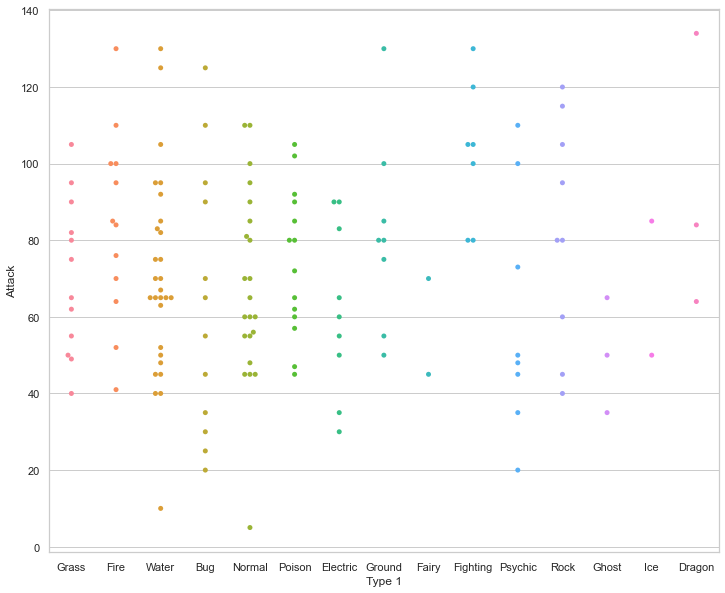

In [25]:
sns.swarmplot(x='Type 1', y='Attack', data=data)

Swarm Plot and Violin Plot display almost similar information. Hence it will be easier to view the distribution if we combine these two plots(overlay them).

Text(0.5, 1.0, 'Attack by Type')

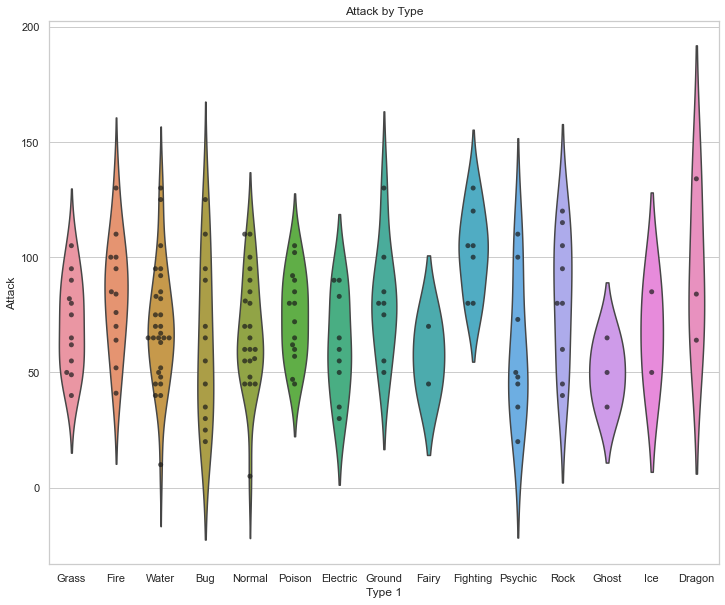

In [26]:
sns.violinplot(x='Type 1', y='Attack', data=data, inner=None) #We will remove the inner part of violin plot
sns.swarmplot(x='Type 1', y='Attack', color='k', alpha=0.7, data=data) #Making the dots black ans slightly transparent
plt.title('Attack by Type')

Now, we will use the melt() function in Pandas to melt all the statistical feature into one single feature. This will help in plotting some amazing plots. Let's check out.

We will melt:- HP, Attack, Defense, Sp.Atk, Sp.Df, Speed

In [47]:
stats_df = data.drop(['#','Total','Stage','Legendary'],axis=1)
melted_df = pd.melt(stats_df,
                    id_vars=['Name','Type 1','Type 2'], # These are the columns NOT to be melted
                    var_name = 'Stat') #Name of melted variable
melted_df.head(10)

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58
5,Charizard,Fire,Flying,HP,78
6,Squirtle,Water,NaN,HP,44
7,Wartortle,Water,NaN,HP,59
8,Blastoise,Water,NaN,HP,79
9,Caterpie,Bug,NaN,HP,45


<AxesSubplot:xlabel='Stat', ylabel='value'>

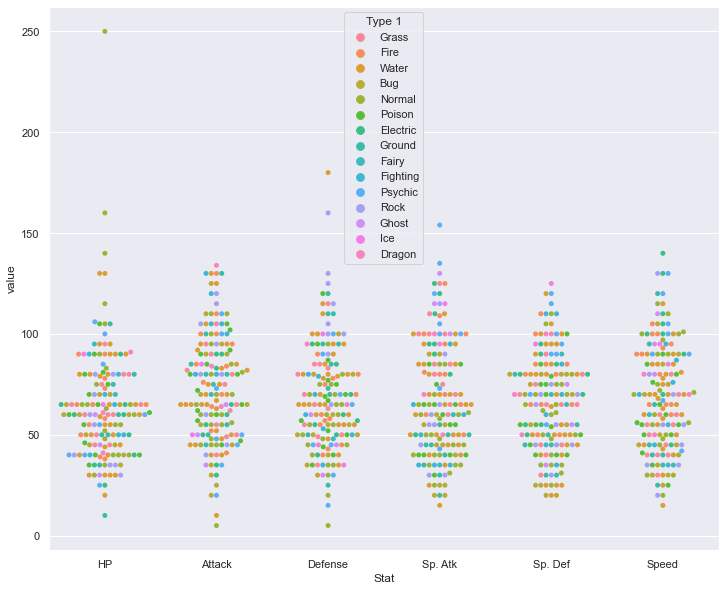

In [51]:
plt.figure(figsize=(12,10))
sns.swarmplot(x='Stat', y='value',data=melted_df,hue='Type 1')

C:\Users\shail\anaconda3\lib\site-packages\seaborn\categorical.py:2999: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\shail\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 41.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\shail\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\shail\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\shail\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size o

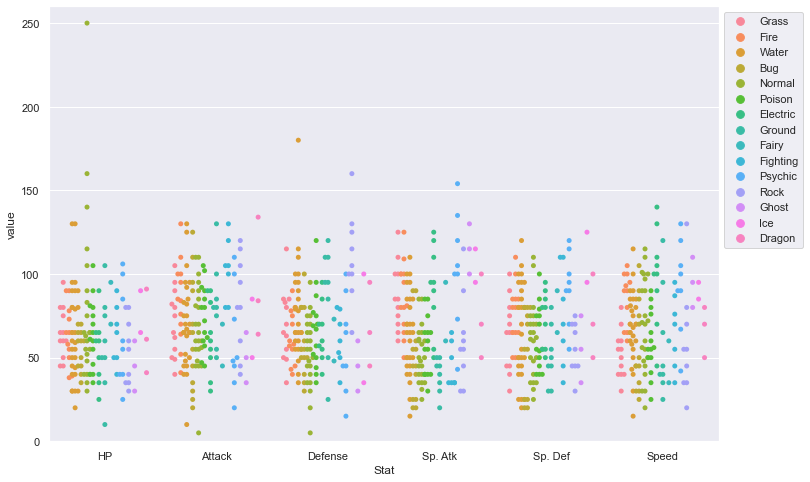

In [54]:
plt.figure(figsize=(12,8))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              split=True) #Separate points by hue
 
#Adjust the y-axis
plt.ylim(0, 260)
 
#Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

# Distribution Plot

<AxesSubplot:xlabel='Attack', ylabel='Density'>

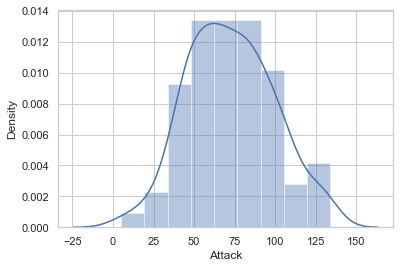

In [30]:
plt.figure(figsize=(6,4))
sns.distplot(data['Attack'])

<AxesSubplot:xlabel='Attack'>

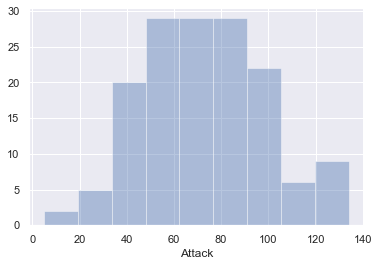

In [32]:
sns.set(rc={'figure.figsize':(6,4)})
sns.distplot(data['Attack'],kde=False)

<AxesSubplot:xlabel='Attack'>

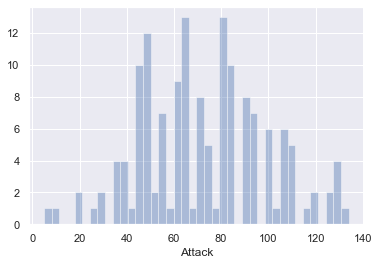

In [33]:
sns.distplot(data['Attack'],kde=False,bins=40)

# Count Plot

<AxesSubplot:xlabel='Type 1', ylabel='count'>

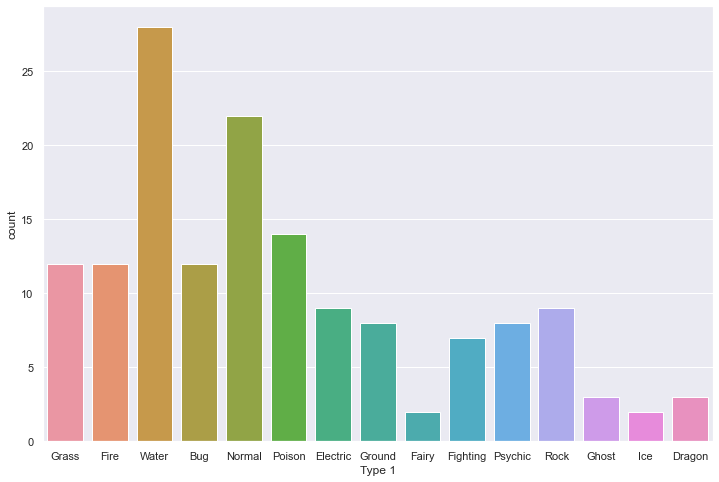

In [38]:
plt.figure(figsize=(12,8))
sns.countplot(x='Type 1',data=data)

<AxesSubplot:xlabel='Type 1', ylabel='count'>

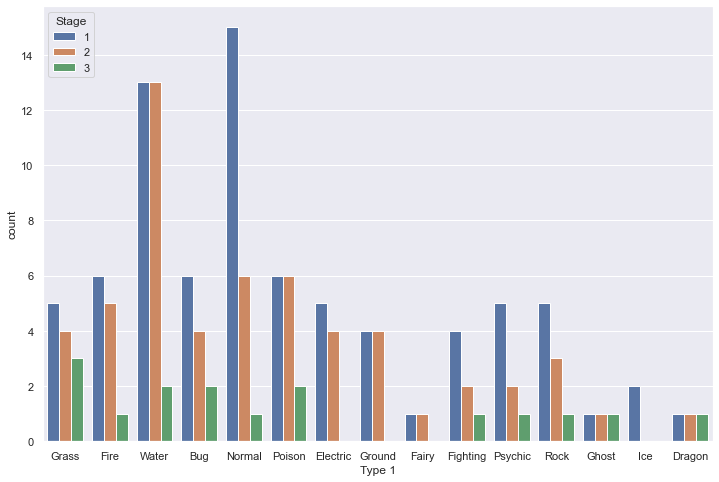

In [40]:
plt.figure(figsize=(12,8))
sns.countplot(x='Type 1',data=data,hue='Stage')

# Pair Plot

Pair Plots performs scatterplot and histogram for every single column. Since it can be a huge plot, we will use a smaller dataset so that we can view all the plots

Note- Careful while using this plot on big datasets as it might take some time to formulate the plots

In [41]:
iris = pd.read_csv('iris.csv')

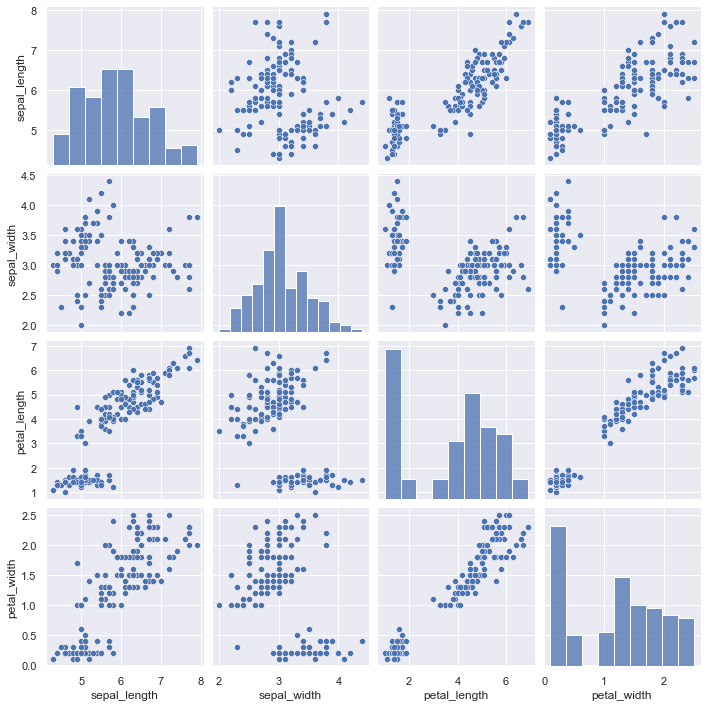

In [43]:
sns.pairplot(iris)

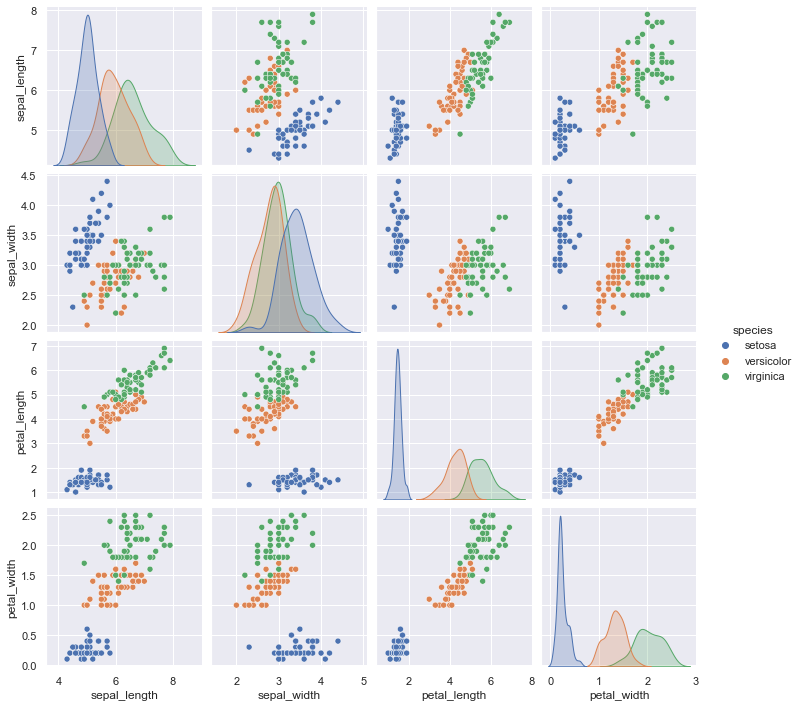

In [44]:
sns.pairplot(iris,hue='species')

# Thank You